<a href="https://colab.research.google.com/github/StanislavChesnokov/Bayes-AB-Test-Best-Coach-Dinamo-Lu-Mi/blob/main/Dinamo_best_coach_Lu_Mi_Baeyes_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Байесовское А/B-тестирование



**Михайличенко (A)**
* Матчи - 29
* Победы - 16

**Луческу (B)**
* Матчи - 26
* Победы - 20

In [ ]:
from scipy.stats import beta
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import lgamma
from numba import jit

In [ ]:
#defining the functions used
@jit
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)

@jit
def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

@jit
def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

In [ ]:
#This is the known data: impressions and conversions for the Control and Test set
imps_ctrl,convs_ctrl=29, 13 
imps_test, convs_test=26, 20

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
beta_C = beta(a_C, b_C)
a_T, b_T = convs_test+1, imps_test-convs_test+1
beta_T = beta(a_T, b_T)

#calculating the lift
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()

#calculating the probability for Test to be better than Control
prob=calc_prob_between(beta_T, beta_C)

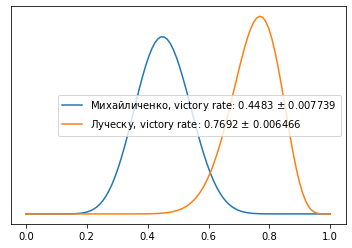

In [ ]:
def calc_beta_mode(a, b):
    '''this function calculate the mode (peak) of the Beta distribution'''
    return (a-1)/(a+b-2)

def plot(betas, names, linf=0, lsup=1):
    '''this function plots the Beta distribution'''
    x=np.linspace(linf,lsup, 100)
    for f, name in zip(betas,names) :
        y=f.pdf(x) #this for calculate the value for the PDF at the specified x-points
        y_mode=calc_beta_mode(f.args[0], f.args[1])
        y_var=f.var() # the variance of the Beta distribution
        plt.plot(x,y, label=f"{name}, victory rate: {y_mode:0.4} $\pm$ {y_var:0.4}")
        plt.yticks([])
    plt.legend()
    plt.show()

plot([beta_C, beta_T], names=["Михайличенко", "Луческу"])

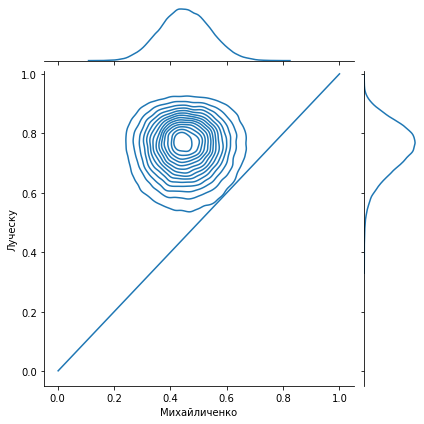

In [ ]:
imps_ctrl,convs_ctrl=29, 13 
imps_test, convs_test=26, 20

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

val_C=np.random.beta(a_C, b_C, 100000)
val_T=np.random.beta(a_T, b_T, 100000)
vals=np.vstack([val_C, val_T]).T

limit=1


df=pd.DataFrame(vals, columns=['Михайличенко', 'Луческу'])
df=df[df['Михайличенко']<limit]
df=df[df['Луческу']<limit]
g=sns.jointplot(x=df['Михайличенко'], y=df['Луческу'], kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])

In [ ]:
print (f"Luchesku Victory Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability.")

Luchesku Victory Rates by 66.07% with 99.2% probability.


При тренере Луческу можно увидеть 66% увеличение доли побед с 99% вероятностью.